# 가위바위보 게임 인공지능 만들기

https://teachablemachine.withgoogle.com/ 
Get Started -> Image Project 를 통해 이미지 생성

In [1]:
import numpy as np
import tensorflow as tf

###### 데이터 불러오기 & Resize하기

In [2]:
# PIL 라이브러리가 설치되어 있지 않다면 
# 아래의 코드로 설치
# !pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


###### 가위사진  Resize ( 나머지들도 동일한 방식으로 resize)

In [3]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/scissor_*.jpg")  # /scissor_뒤에 오는 모든 숫자를 *로 표현

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


###### dataset 사진 파일이 jpg가 아닌 png의 경우 jpg로 변환하는 방법

In [3]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/scissor_*.png")  # /scissor_뒤에 *은
앞에  멀

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    old_img=old_img.convert('RGB')
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


######  [ 폴더의 이미지들 모으려고하는데 이름들이 모두 겹칠 때 사용 ] 

In [15]:
import sys
import os 


file_path = '/home/aiffel/aiffel/2ndWeek_0727_0731/rock_scissor_paper/dataset/'


foleder_name = ['rock/','paper/','scissor/']


for i in foleder_name:
    file_name = os.listdir(file_path+i)
    start_num = 0 # 이어서 붙이고 싶은 번호를 적는다 
    for j in file_name:
        origin_name = file_path+i+j
        change_name = file_path+i+str(start_num)+'.jpg'
        os.rename(origin_name,change_name)
        start_num +=1

        

###### Train data  load

In [4]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=489   # 가위바위보 이미지 개수 총합에 주의하세요.  가위바위보를 합한 총합 개수
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/2ndWeek_0727_0731/rock_scissor_paper/dataset"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 489 입니다.
x_train shape: (489, 28, 28, 3)
y_train shape: (489,)


###### 이미지 가져오기

라벨:  0


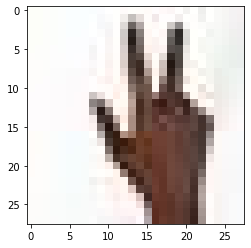

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

###### 네트워크 설계

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(512, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 512)       1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1638528   
_________________________________________________________________
dense_1 (Dense)              (No

###### 네트워크 학습시키기

In [7]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=9)

Epoch 1/9
16/16 [==============================] - 4s 223ms/step - loss: 80.9066 - accuracy: 0.4458
Epoch 2/9
16/16 [==============================] - 0s 27ms/step - loss: 0.8017 - accuracy: 0.6544
Epoch 3/9
16/16 [==============================] - 0s 28ms/step - loss: 0.5421 - accuracy: 0.7505
Epoch 4/9
16/16 [==============================] - 0s 27ms/step - loss: 0.4096 - accuracy: 0.8262
Epoch 5/9
16/16 [==============================] - 0s 28ms/step - loss: 0.3084 - accuracy: 0.8937
Epoch 6/9
16/16 [==============================] - 0s 28ms/step - loss: 0.2315 - accuracy: 0.9080
Epoch 7/9
16/16 [==============================] - 0s 27ms/step - loss: 0.1974 - accuracy: 0.9243
Epoch 8/9
16/16 [==============================] - 0s 28ms/step - loss: 0.1790 - accuracy: 0.9427
Epoch 9/9
16/16 [==============================] - 0s 28ms/step - loss: 0.1514 - accuracy: 0.9427


###### Test용 데이터 불러오기

In [8]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]



def test_load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/2ndWeek_0727_0731/rock_scissor_paper/dataset/test_data"
(x_test, y_test) = test_load_data(image_dir_path)

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


###### model test_accuracy 측정

In [10]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

3/3 [==============================] - 1s 495ms/step - loss: 0.2677 - accuracy: 0.9300
## evaluation loss and_metrics ##
[0.2677028775215149, 0.9300000071525574]


###### 결과에 대한 내용

- 초반 시도시 0.3 ~0.4 정도의 accuracy에서 못벗어남
- 데이터 증대로 0.4~ 0.5로 증가
- hyperparameter 조절로 최대 0.56까지 증가
- 그 후 네트워크 추가 및 삭제 , hyperparameter조정, 데이터 증가에도 별 변화 없음
- 테스트 데이터를 한 사람의 사진으로만 이루어져 있어 제대로 맞춰지지 않는 것 같아 전체 데이터셋 통합 후 -> shuffle ->  train/test 로 분할시켜 진행 (가능여부 코치진에게 미리 확인함 ) 
- 이후 0.9대의 정확성 